## Description.

- Food delivery is a courier service in which a restaurant, store, or independent food-delivery         company delivers food to a customer.

- An order is typically made either through a restaurant or grocer's website or mobile app, or through   a food ordering company. 

- The delivered items can include entrees, sides, drinks, desserts, or grocery items and are typically   delivered in boxes or bags. 

- The delivery person will normally drive a car, but in bigger cities where homes and restaurants are   closer together, they may use bikes or motorized scooters.

- latitude and longitude, coordinate system by means of which the position or location of any place on   Earth’s surface can be determined and described.

- Timing is the key. provider wants to dispatch the delivery person to arrive just when the order is     ready. If it is too early then the delivery person will wait around unnecessarily, losing money from   other possible orders. But wait too long and the food may arrive late, or cold, to the hungry         customers.

- When users open the app and peruse a selection of restaurants, they are given a general estimate of   how long it will take for the food to arrive. It also offers restaurants the ability to estimate of   how long it would take the food to be prepared, which the restaurants can adjust if they want.

- when make decision. “For every decision we are making, we are taking into consideration all the       partners,” fastest delivery time for the eater, most accurate arrival time for the delivery person,   and the most accurate food preparation estimate for the restaurant.

- “We want the food delivery partner to arrive at the exact time the food will be ready. We don’t want   them to arrive too late because the food will be cold. we don’t want them to arrive too early         because they waste their time waiting there, and also they would take the parking and dining spaces   from the restaurant,”

## Problem Statement.

- Use this dataset to determine estimated time for food delivery.

- The goal of the service is to make food delivery reliable, effortless, and affordable for end-users.   “ We want to sure the food will be delivered seamlessly, which requires us to predict the future and   balance between orders and delivery partners.

#### Importing All Required Libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import traceback
import re
import statistics
import missingno as msno
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from geopy.distance import geodesic

#### Loading Dataset.

In [2]:
df = pd.read_csv("train.csv")
df2 = df.copy()

In [3]:
df2.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


### Data Explore.

In [4]:
# Checking No. of row and columns in DataFrame.
df2.shape

(45593, 20)

In [5]:
# Check the Columns In DataFrame.
df2.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)'],
      dtype='object')

In [6]:
# Check the DataFrame Structure.
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [7]:
# Describe Numerical Features.
df2.describe()

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,17.017729,70.231332,17.465186,70.845702,1.023359
std,8.185109,22.883647,7.335122,21.118812,0.839065
min,-30.905562,-88.366217,0.010000,0.010000,0.000000
25%,12.933284,73.170000,12.988453,73.280000,0.000000
50%,18.546947,75.898497,18.633934,76.002574,1.000000
75%,22.728163,78.044095,22.785049,78.107044,2.000000
max,30.914057,88.433452,31.054057,88.563452,3.000000


In [8]:
df2.describe(include="O").T

,count,unique,top,freq
ID,45593,45593,0x4607,1
Delivery_person_ID,45593,1320,PUNERES01DEL01,67
Delivery_person_Age,45593,23,35,2262
Delivery_person_Ratings,45593,29,4.8,7148
Order_Date,45593,44,15-03-2022,1192
Time_Orderd,45593,177,NaN,1731
Time_Order_picked,45593,193,21:30:00,496
Weatherconditions,45593,7,conditions Fog,7654
Road_traffic_density,45593,5,Low,15477
Type_of_order,45593,4,Snack,11533


In [9]:
# Checking Unique Values In Categorical Features.
for i in df2.columns:
    if df2[i].dtypes=="object":
        print(i)
        print(df2[i].unique())
        print("*"*75)

ID
['0x4607 ' '0xb379 ' '0x5d6d ' ... '0x4f8d ' '0x5eee ' '0x5fb2 ']
***************************************************************************
Delivery_person_ID
['INDORES13DEL02 ' 'BANGRES18DEL02 ' 'BANGRES19DEL01 ' ...
 'KOCRES04DEL01 ' 'BHPRES06DEL03 ' 'GOARES03DEL03 ']
***************************************************************************
Delivery_person_Age
['37' '34' '23' '38' '32' '22' '33' '35' '36' '21' '24' '29' '25' '31'
 '27' '26' '20' 'NaN ' '28' '39' '30' '15' '50']
***************************************************************************
Delivery_person_Ratings
['4.9' '4.5' '4.4' '4.7' '4.6' '4.8' '4.2' '4.3' '4' '4.1' '5' '3.5'
 'NaN ' '3.8' '3.9' '3.7' '2.6' '2.5' '3.6' '3.1' '2.7' '1' '3.2' '3.3'
 '6' '3.4' '2.8' '2.9' '3']
***************************************************************************
Order_Date
['19-03-2022' '25-03-2022' '05-04-2022' '26-03-2022' '11-03-2022'
 '04-03-2022' '14-03-2022' '20-03-2022' '12-02-2022' '13-02-2022'
 '14-02-2022' '02-04

In [10]:
# Checking Value Counts In Categorical Features.
for i in df2.columns:
    if df2[i].dtypes=="object":
        print(i)
        print(df2[i].value_counts())
        print("*"*75)

ID
0x4607     1
0x1f3e     1
0xe251     1
0x3f31     1
0x4a78     1
          ..
0xc3f1     1
0x5db7     1
0x1985     1
0xceda     1
0x5fb2     1
Name: ID, Length: 45593, dtype: int64
***************************************************************************
Delivery_person_ID
PUNERES01DEL01     67
JAPRES11DEL02      67
HYDRES04DEL02      66
JAPRES03DEL01      66
VADRES11DEL02      66
                   ..
DEHRES18DEL03       7
AURGRES11DEL03      7
KOLRES09DEL03       6
KOCRES16DEL03       6
BHPRES010DEL03      5
Name: Delivery_person_ID, Length: 1320, dtype: int64
***************************************************************************
Delivery_person_Age
35      2262
36      2260
37      2227
30      2226
38      2219
24      2210
32      2202
22      2196
29      2191
33      2187
28      2179
25      2174
34      2166
26      2159
21      2153
27      2150
39      2144
20      2136
31      2120
23      2087
NaN     1854
50        53
15        38
Name: Delivery_person_Age, dtyp

#### Some Preprocessing Before EDA.

In [11]:
# Renaming Some Features.
df2 = df2.rename({"Delivery_person_Age":"Age", "Delivery_person_Ratings":"Ratings",
                  "Delivery_location_latitude":"Delivery_latitude","Order_Date":"Date",
                  "Delivery_location_longitude":"Delivery_longitude","Weatherconditions":"Weather", 
                  "Road_traffic_density":"Traffic", "Type_of_vehicle":"Vehicle",
                  "Time_taken(min)":"Time_taken"},axis=1)

In [12]:
# Changing the names of classes in Weather Feature.
df2["Weather"] = df2["Weather"].str.replace("conditions","")

In [13]:
df2["Weather"].value_counts()

 Fog           7654
 Stormy        7586
 Cloudy        7536
 Sandstorms    7495
 Windy         7422
 Sunny         7284
 NaN            616
Name: Weather, dtype: int64

## Exploratory Data Analysis.

#### 1. Finding The Unwanted Or Irrelevent Features.

- Id and Delivery Person Id does not provide much information.

#### 2. Find Missing Values.

In [14]:
df2.isna().sum()

ID                      0
Delivery_person_ID      0
Age                     0
Ratings                 0
Restaurant_latitude     0
Restaurant_longitude    0
Delivery_latitude       0
Delivery_longitude      0
Date                    0
Time_Orderd             0
Time_Order_picked       0
Weather                 0
Traffic                 0
Vehicle_condition       0
Type_of_order           0
Vehicle                 0
multiple_deliveries     0
Festival                0
City                    0
Time_taken              0
dtype: int64

- It Shows there is no missing values in our dataset but as we seen in above Age, Ratings,Time_Orderd,   Weather, Traffic, multiple_deliveries, Festival and City features have the some missing value.
- To know the missing values we have to preprocess the data first.

In [15]:
## Replacing string NaN values in all columns with np.nan :
df2.replace({"NaN": np.nan}, regex=True, inplace = True)

In [16]:
# Checking Null Values In Dataset.
df2.isna().sum()

ID                         0
Delivery_person_ID         0
Age                     1854
Ratings                 1908
Restaurant_latitude        0
Restaurant_longitude       0
Delivery_latitude          0
Delivery_longitude         0
Date                       0
Time_Orderd             1731
Time_Order_picked          0
Weather                  616
Traffic                  601
Vehicle_condition          0
Type_of_order              0
Vehicle                    0
multiple_deliveries      993
Festival                 228
City                    1200
Time_taken                 0
dtype: int64

In [17]:
# Missing Value Ratio.
df2.isna().mean()*100

ID                      0.000000
Delivery_person_ID      0.000000
Age                     4.066414
Ratings                 4.184853
Restaurant_latitude     0.000000
Restaurant_longitude    0.000000
Delivery_latitude       0.000000
Delivery_longitude      0.000000
Date                    0.000000
Time_Orderd             3.796635
Time_Order_picked       0.000000
Weather                 1.351085
Traffic                 1.318185
Vehicle_condition       0.000000
Type_of_order           0.000000
Vehicle                 0.000000
multiple_deliveries     2.177966
Festival                0.500077
City                    2.631983
Time_taken              0.000000
dtype: float64

- Delivery_person_Age, Delivery_person_Ratings, Time_Orderd, City, Festival, multiple_deliveries,      Weatherconditions, Road_traffic_density features have the some missing value.

#### 3. Find Features with one value.

In [18]:
df2.nunique()

ID                      45593
Delivery_person_ID       1320
Age                        22
Ratings                    28
Restaurant_latitude       657
Restaurant_longitude      518
Delivery_latitude        4373
Delivery_longitude       4373
Date                       44
Time_Orderd               176
Time_Order_picked         193
Weather                     6
Traffic                     4
Vehicle_condition           4
Type_of_order               4
Vehicle                     4
multiple_deliveries         4
Festival                    2
City                        3
Time_taken                 45
dtype: int64

- There Are No feature with only one value.

#### 4. Explore the Categorical Features.

In [19]:
categorical = [i for i in df2.columns if ((df2[i].dtypes=="object") & (i not in ["Time_taken"]))]
categorical

['ID',
 'Delivery_person_ID',
 'Age',
 'Ratings',
 'Date',
 'Time_Orderd',
 'Time_Order_picked',
 'Weather',
 'Traffic',
 'Type_of_order',
 'Vehicle',
 'multiple_deliveries',
 'Festival',
 'City']

- As you seen in unique values in features ID, Age, Ratings, Order_Date, Time_Orderd,                   Time_Order_picked, multiple_deliveries are numeric values but there data type is object so we remove   them in categorical feature.

In [20]:
categorical = categorical[7:]

In [21]:
categorical.remove("multiple_deliveries")

In [22]:
categorical

['Weather', 'Traffic', 'Type_of_order', 'Vehicle', 'Festival', 'City']

- There are 6 feature which are categorical.

#### 5. Explore the Numerical Feature.

In [23]:
Numerical = [i for i in df2.columns if ((df2[i].dtypes!="object") & (i not in ["Time_taken"]))]
Numerical

['Restaurant_latitude',
 'Restaurant_longitude',
 'Delivery_latitude',
 'Delivery_longitude',
 'Vehicle_condition']

- There are 5 numerical features but as you seen in above unique values in features some features are 
  numeric but there data type is object so we have to change there dtypes.

In [24]:
# Changing data type of Some columns :
try:    
    df2["Age"]=df2["Age"].astype(float)
    df2['Ratings']=df2['Ratings'].astype(float)
    df2['multiple_deliveries']=df2['multiple_deliveries'].astype(float)
except:
    print(traceback.print_exc())

In [25]:
Numerical = [i for i in df2.columns if ((df2[i].dtypes!="object") & (i not in ["Time_taken"]))]
Numerical

['Age',
 'Ratings',
 'Restaurant_latitude',
 'Restaurant_longitude',
 'Delivery_latitude',
 'Delivery_longitude',
 'Vehicle_condition',
 'multiple_deliveries']

- There are 8 numerical features.

#### 6. Find Discrete Numerical Features.

In [26]:
discrete = [i for i in Numerical if len(df2[i].unique())<23]
discrete

['Vehicle_condition', 'multiple_deliveries']

- There are 2 features which are discrete.

#### 7. Find Continuous Numerical Features.

In [27]:
Continuous = [i for i in Numerical if i not in discrete+['Time_taken']]
print("Continuous feature Count {}".format(len(Continuous)))

Continuous feature Count 6


In [28]:
Continuous

['Age',
 'Ratings',
 'Restaurant_latitude',
 'Restaurant_longitude',
 'Delivery_latitude',
 'Delivery_longitude']

- There Are 6 features which are continuous.

#### 8. Target Feature.

In [29]:
target = "Time_taken"

In [30]:
## Delete string part of time_taken Feature :
df2['Time_taken'] = df2['Time_taken'].str.replace(r'\D', '',regex=True).astype(int)

In [31]:
df2.head()

,ID,Delivery_person_ID,Age,Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_latitude,Delivery_longitude,Date,Time_Orderd,Time_Order_picked,Weather,Traffic,Vehicle_condition,Type_of_order,Vehicle,multiple_deliveries,Festival,City,Time_taken
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24
1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33
2,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,26
3,0x7a6a,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21
4,0x70a2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,30


### Data Visualization.

#### Find Categorical Feature Distribution.

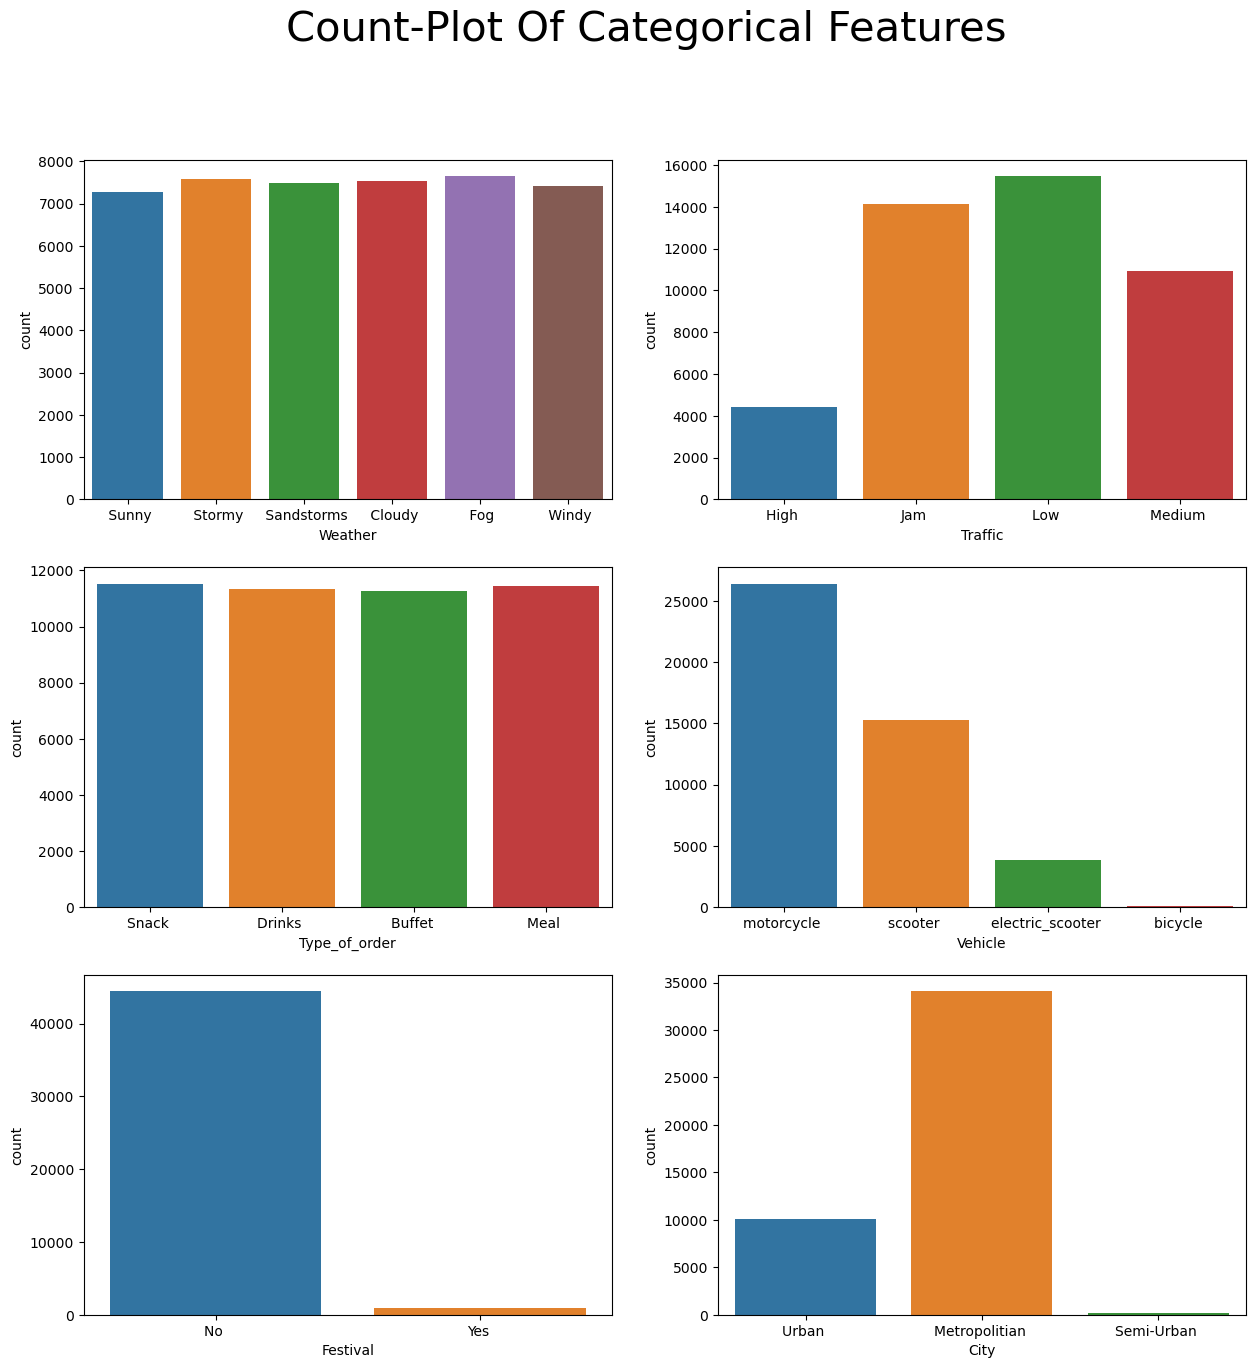

In [32]:
plt.figure(figsize=(15,15))
for i,col in enumerate(categorical,1):
    plt.subplot(3,2,i)
    sns.countplot(df2[col])
plt.suptitle("Count-Plot Of Categorical Features", fontsize=30)
plt.show()

- classes in weather are almost have equal records.
- Traffic type as jam and low have high records.
- classes in type_of_order are almost have equal records.
- type_of_vehicle type as motorcycle have high records and bicycle have very low records.
- festival type as no records are very high.
- In city type deliveries are made in metropolitian areas are high.

#### Relationship between Categorical Features and Target Feature.

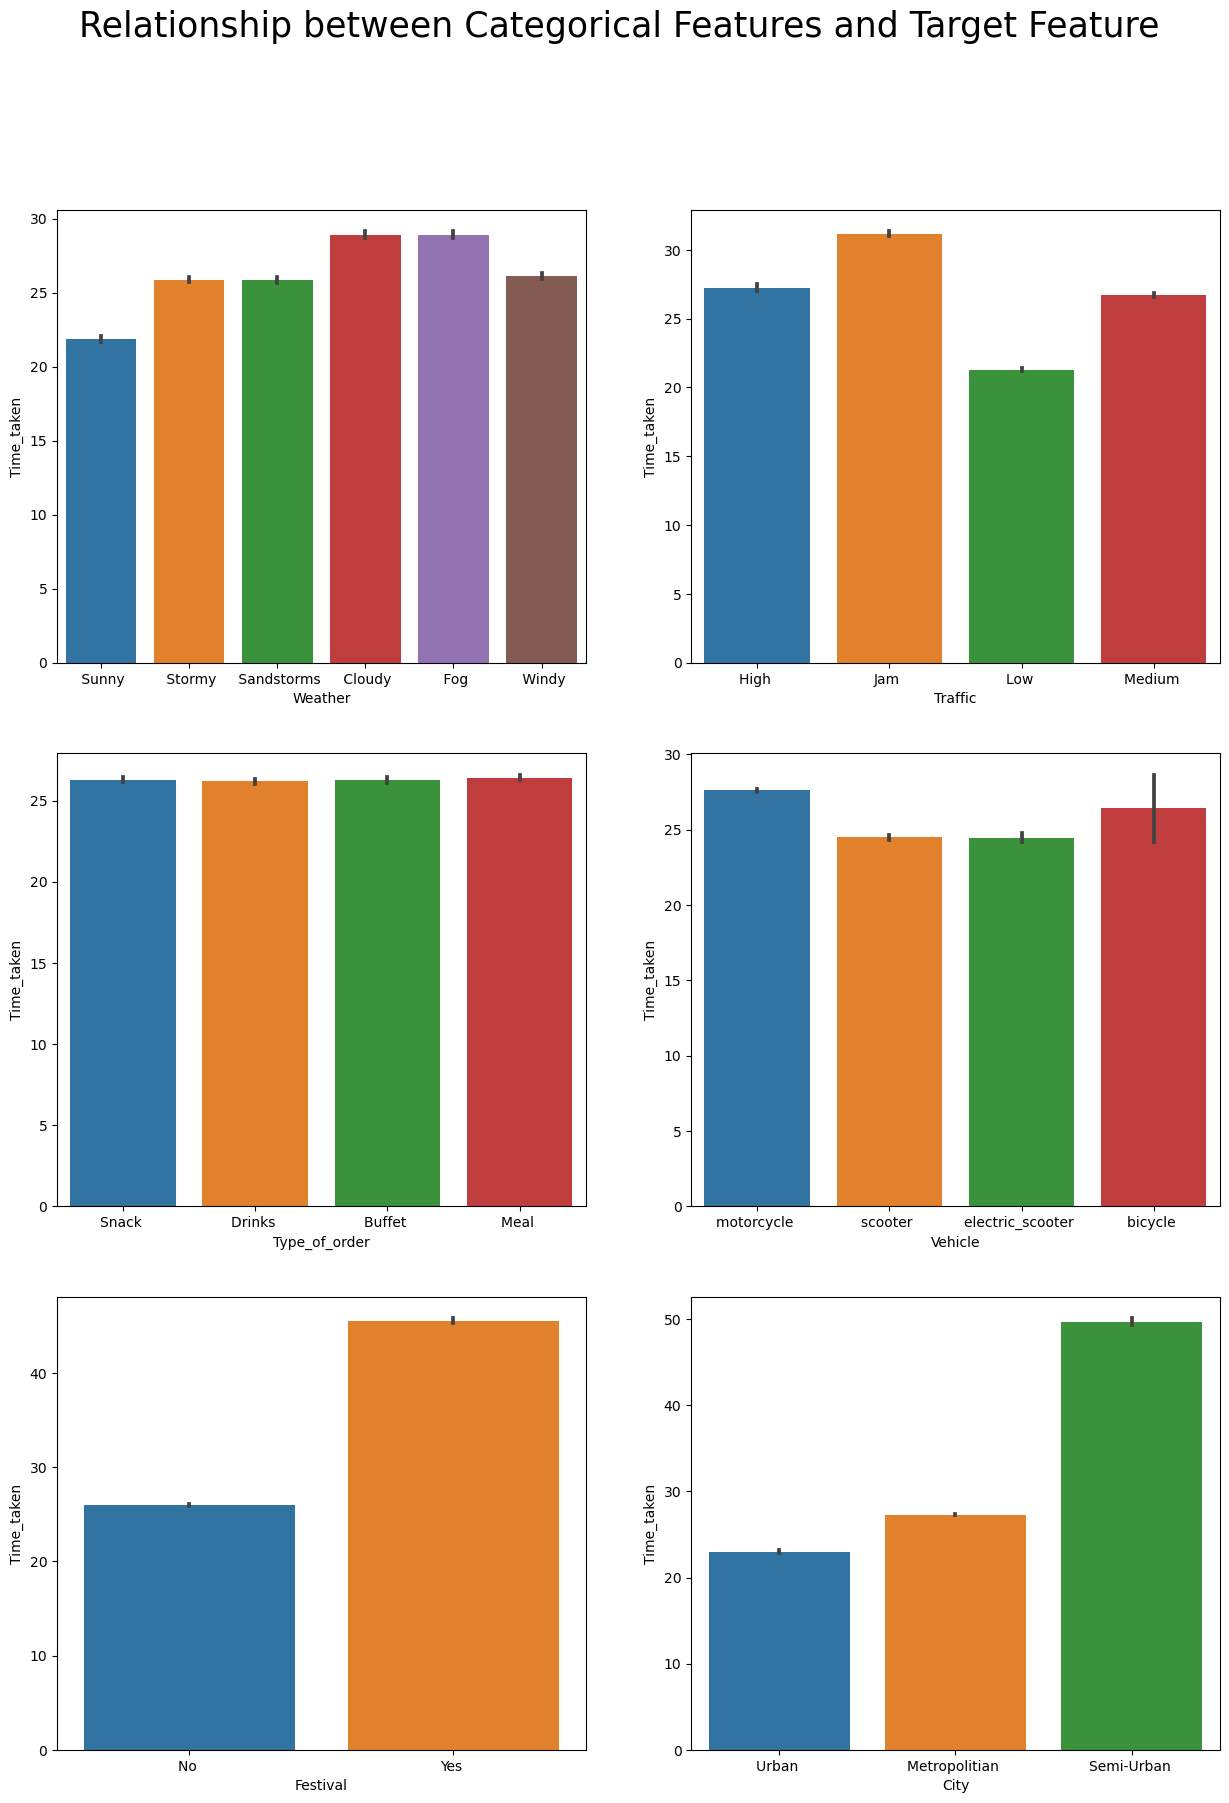

In [33]:
plt.figure(figsize=(15,20))
for i,col in enumerate(categorical,1):
    plt.subplot(3,2,i)
    sns.barplot(df2[col],df2["Time_taken"])
plt.suptitle("Relationship between Categorical Features and Target Feature", fontsize=25)
plt.show()

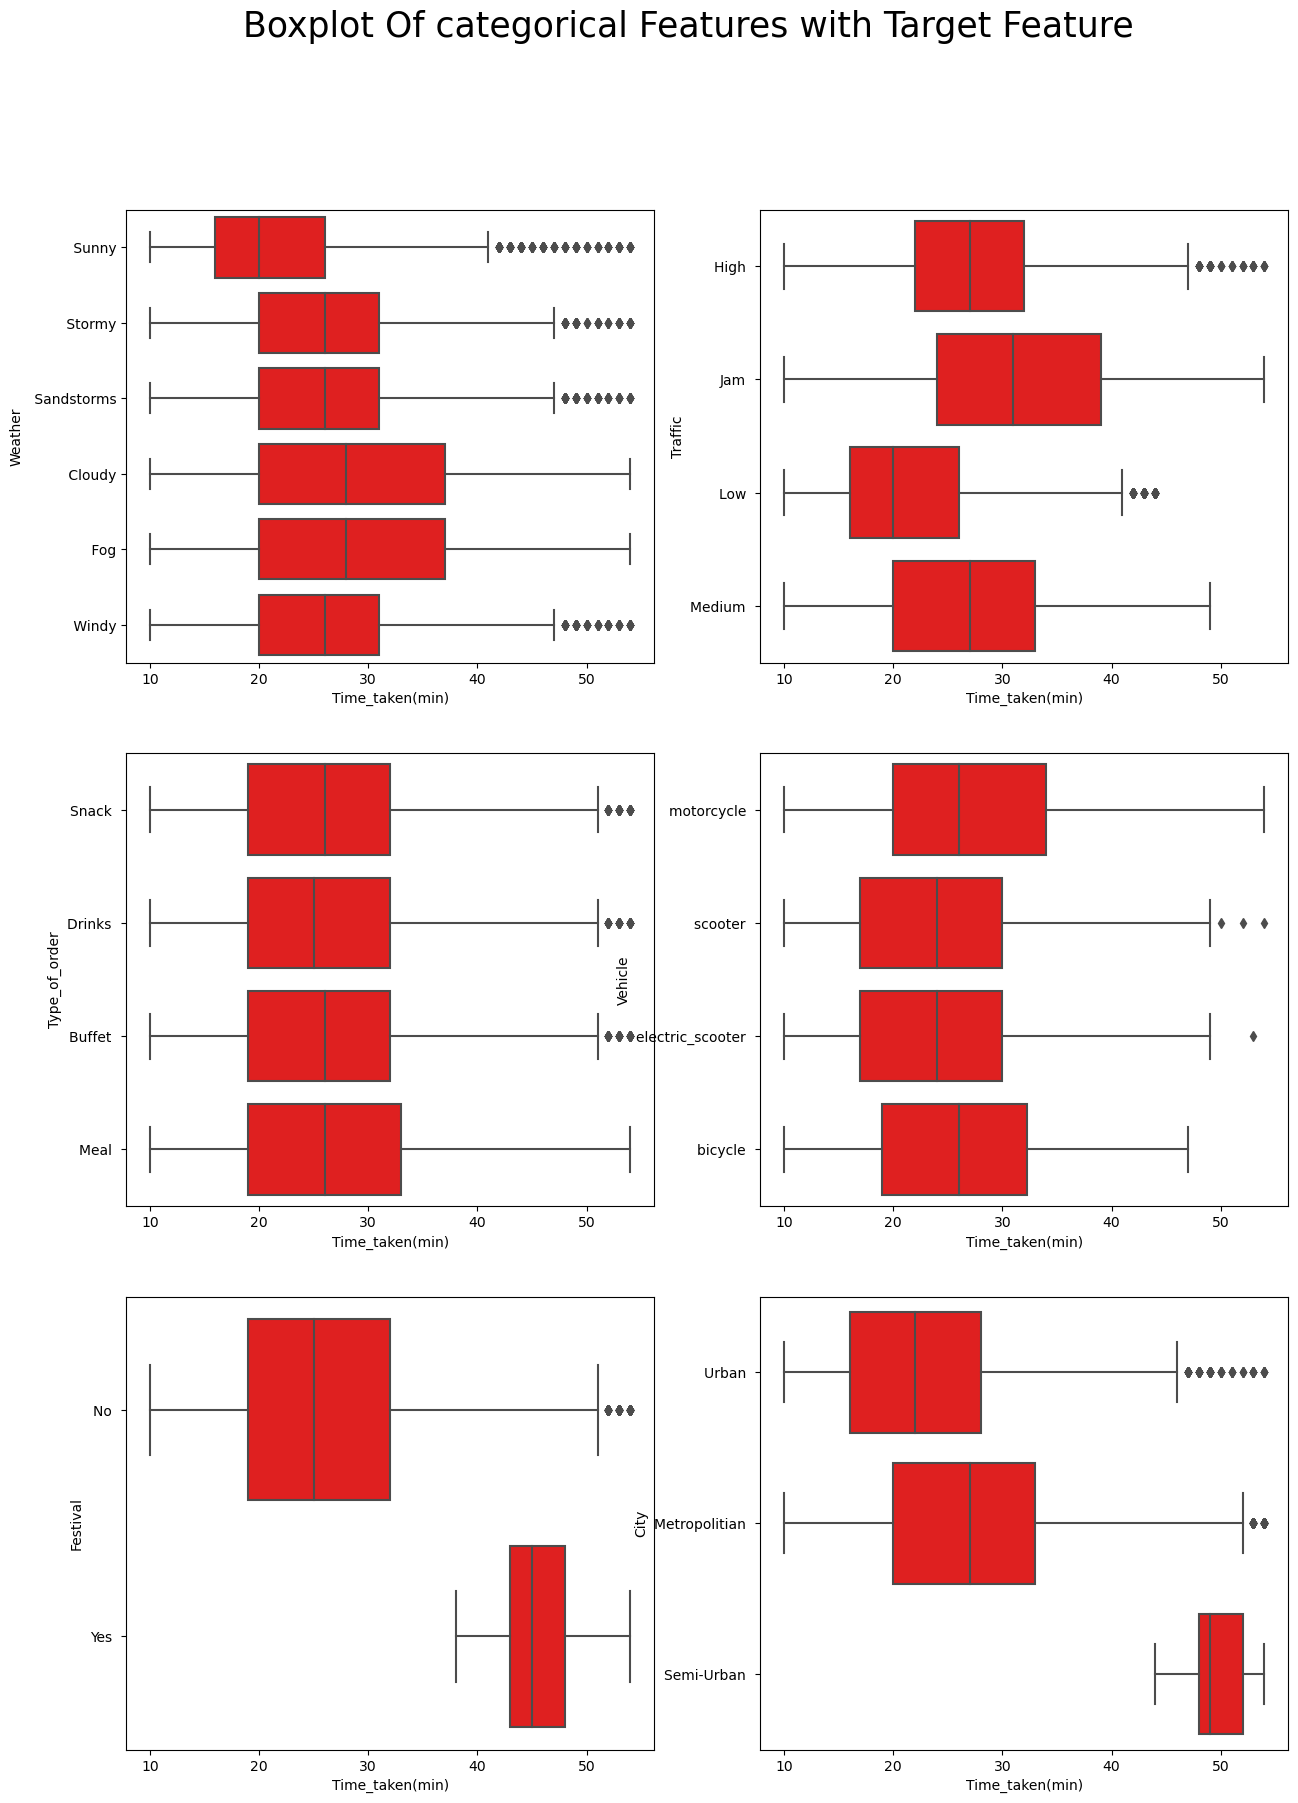

In [34]:
# Boxplot to show target distribution with respect categorical Features.
plt.figure(figsize=(15,20))
for i,col in enumerate(categorical,1):
    plt.subplot(3,2,i)
    sns.boxplot(x=df2["Time_taken"], y=df2[col], data=df2, color="r")
    plt.xlabel("Time_taken(min)")
plt.suptitle("Boxplot Of categorical Features with Target Feature", fontsize=25)
plt.show()

#### Discrete Feature Distribution.

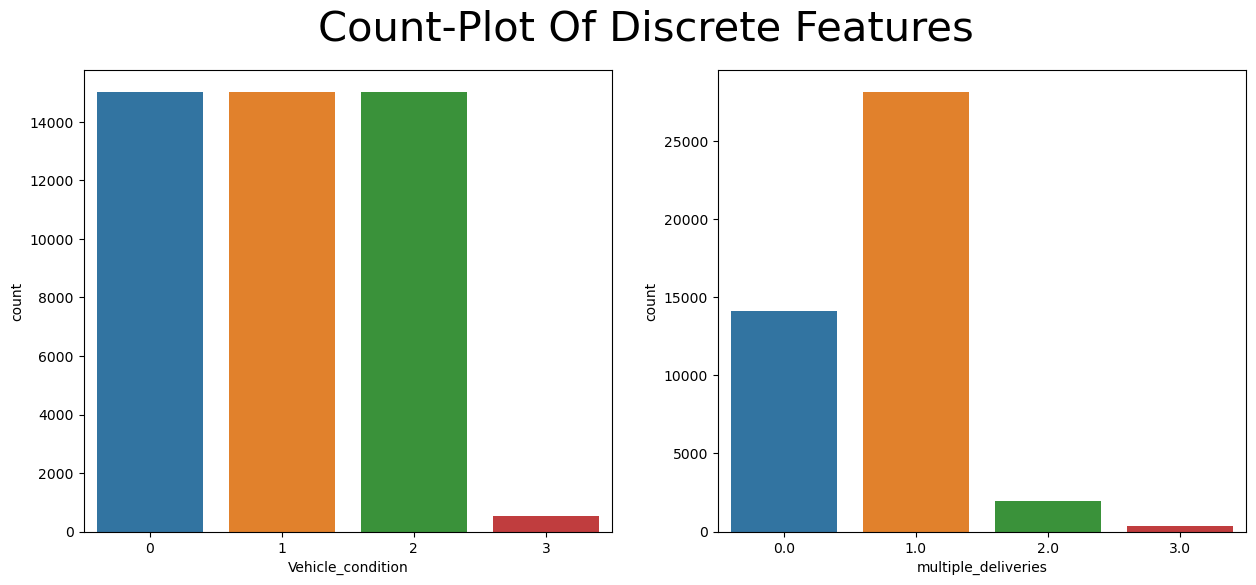

In [35]:
plt.figure(figsize=(15,6))
for i,col in enumerate(discrete,1):
    plt.subplot(1,2,i)
    sns.countplot(df2[col])
plt.suptitle("Count-Plot Of Discrete Features", fontsize=30)
plt.show()

#### Relationship between Discrete Features and Target Feature.

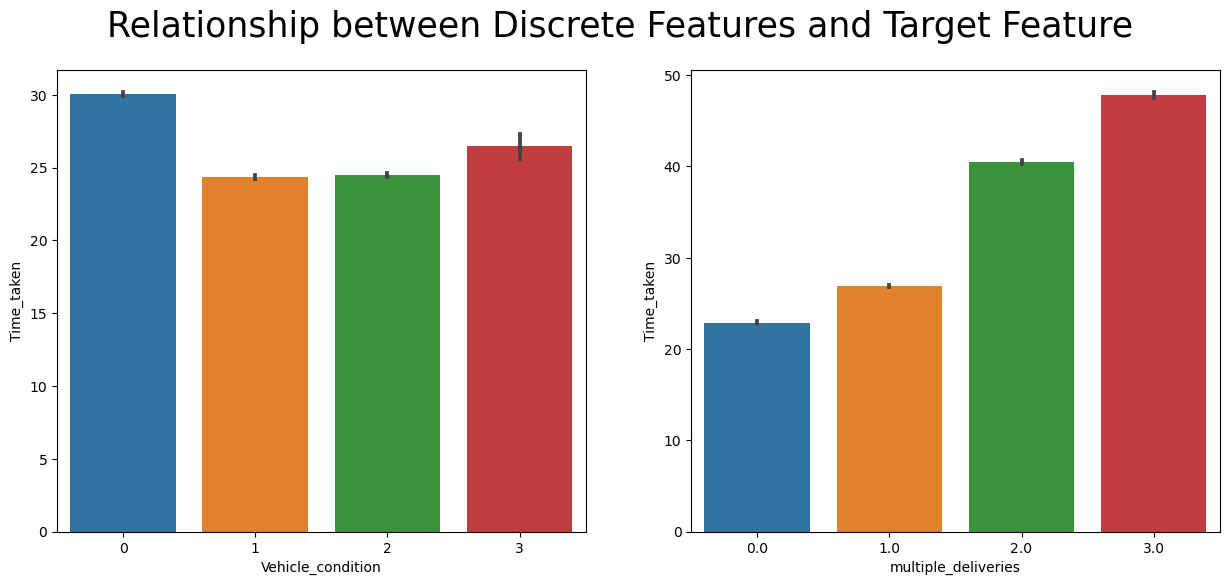

In [36]:
plt.figure(figsize=(15,6))
for i,col in enumerate(discrete,1):
    plt.subplot(1,2,i)
    sns.barplot(df2[col],df2["Time_taken"])
plt.suptitle("Relationship between Discrete Features and Target Feature", fontsize=25)
plt.show()

#### Distribution of Continuous Numerical Features.

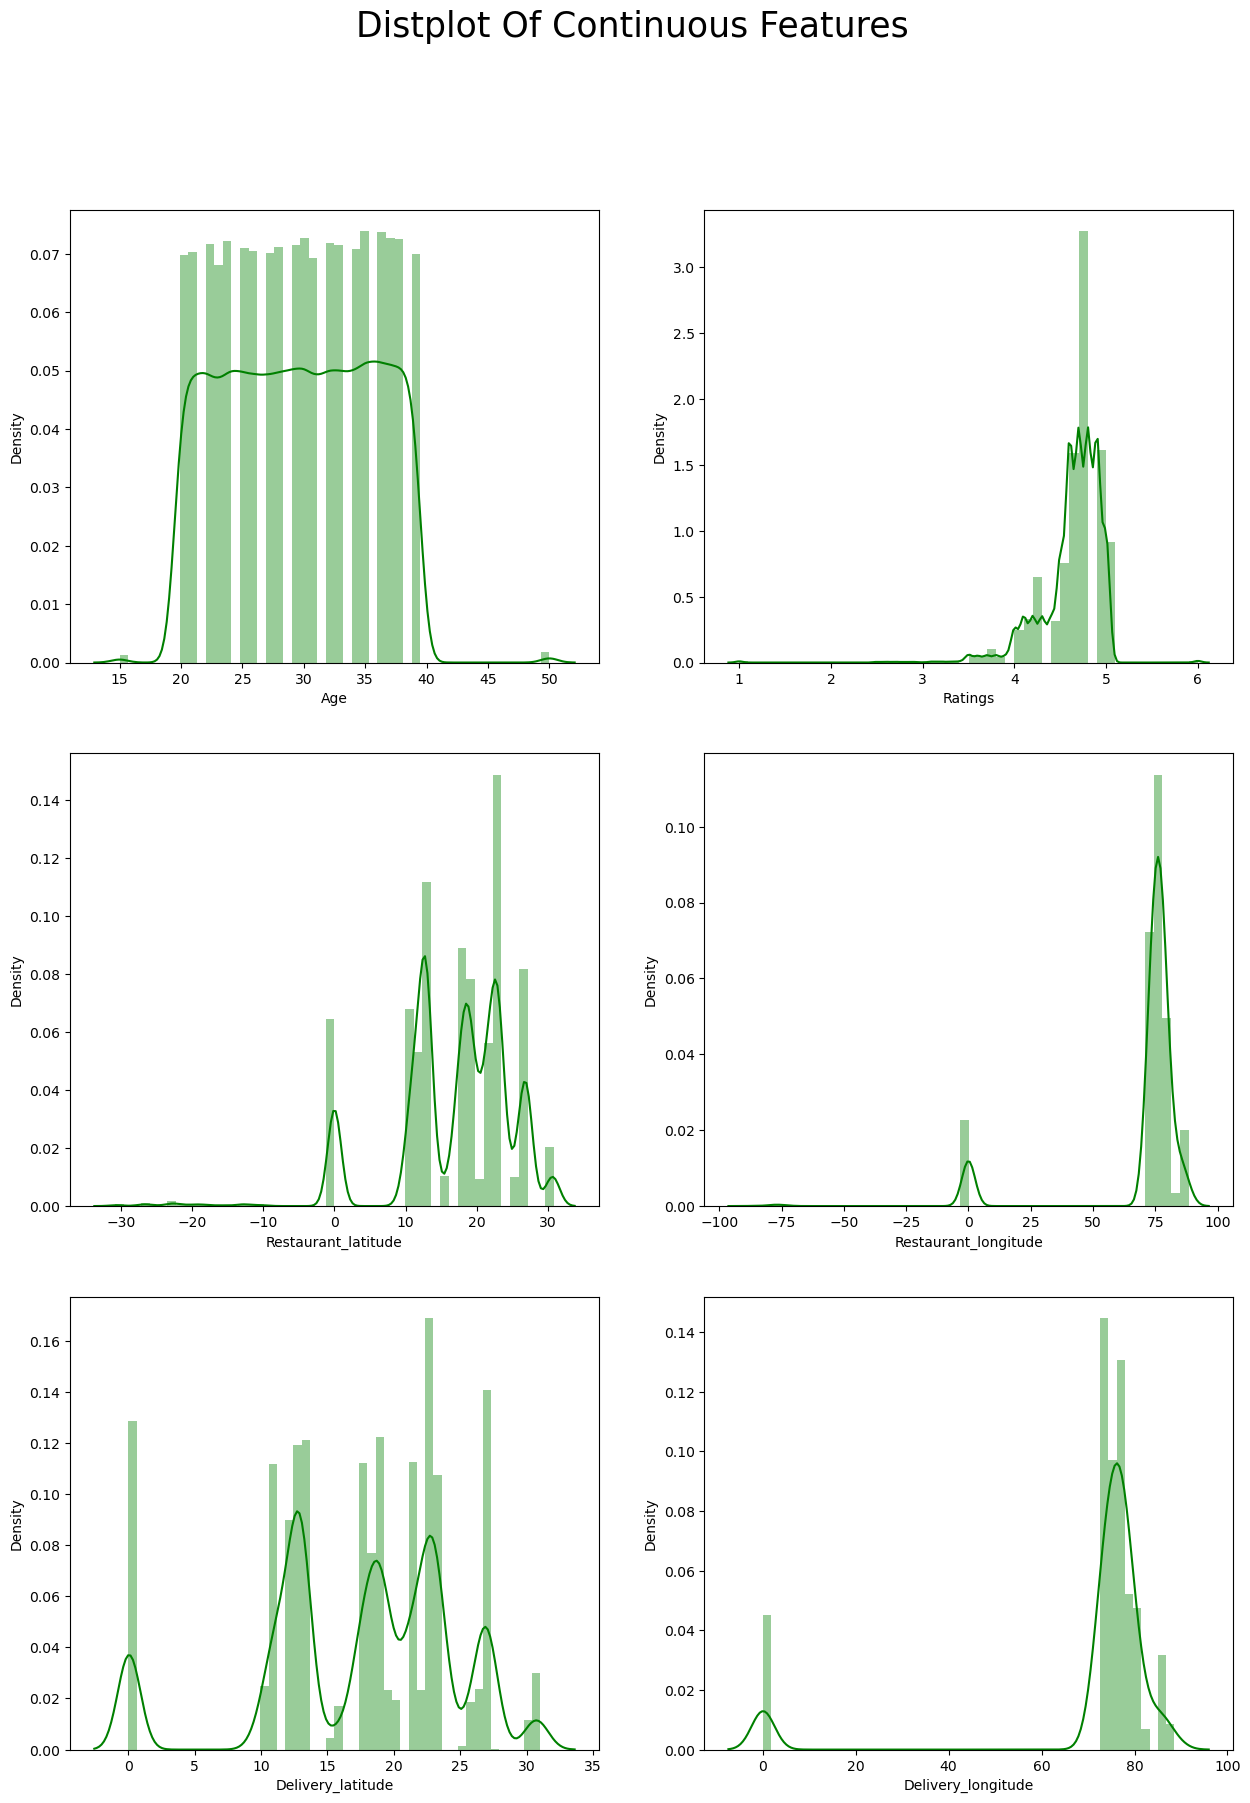

In [37]:
# Plot a univariate distribution of Continuous Features. 
plt.figure(figsize=(15,20))
for i,col in enumerate(Continuous,1):
    plt.subplot(3,2,i)
    sns.distplot(df2[col],color="g")
plt.suptitle("Distplot Of Continuous Features", fontsize=25)
plt.show()

#### Find Outliars In Continuous Features.

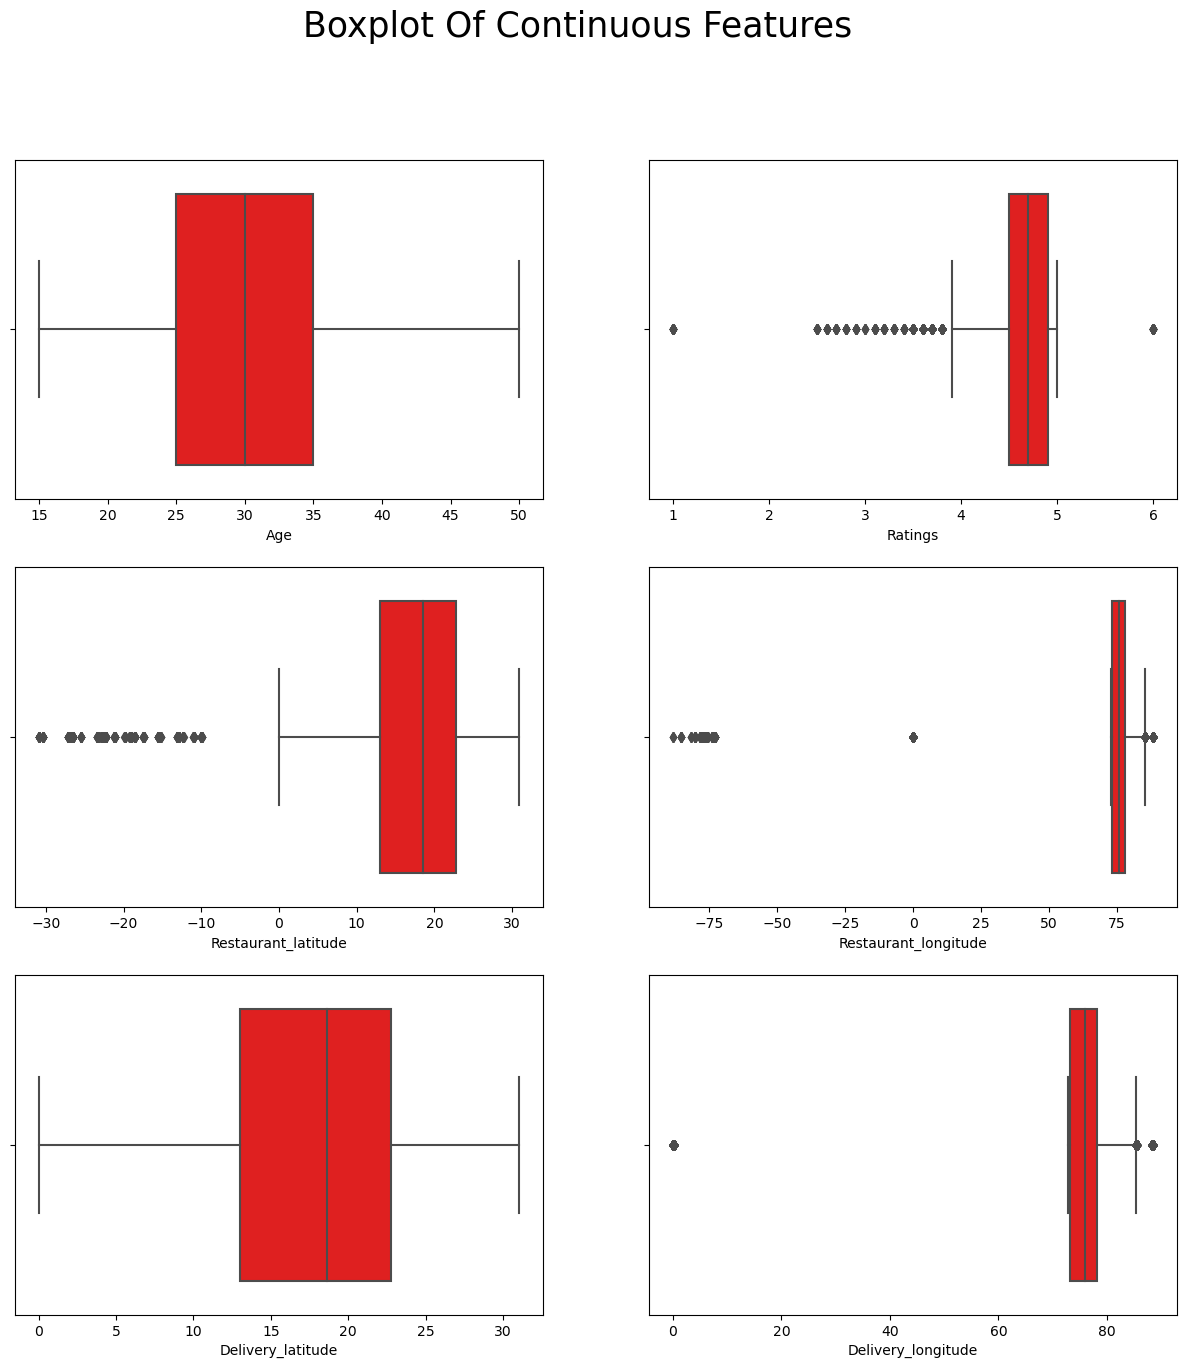

In [38]:
# Boxplot Of Continuous Features.
plt.figure(figsize=(15,15))
for i,col in enumerate(Continuous,1):
    plt.subplot(3,2,i)
    sns.boxplot(df2[col], color="r")
    plt.xlabel(col)
plt.suptitle("Boxplot Of Continuous Features", fontsize=25)
plt.show()

#### Checking Target Feature Distribution.

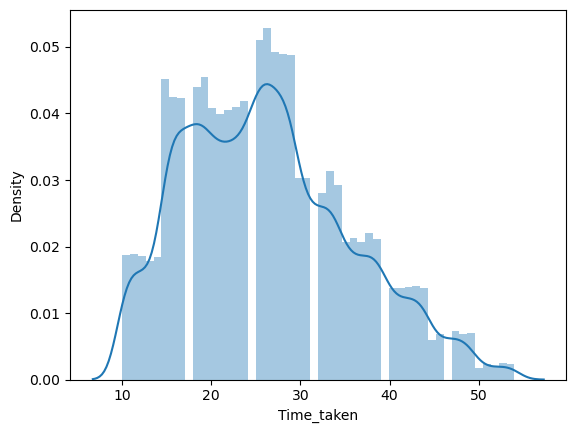

In [39]:
sns.distplot(df2["Time_taken"])
plt.show()

#### Explore the Correlation between numerical features.

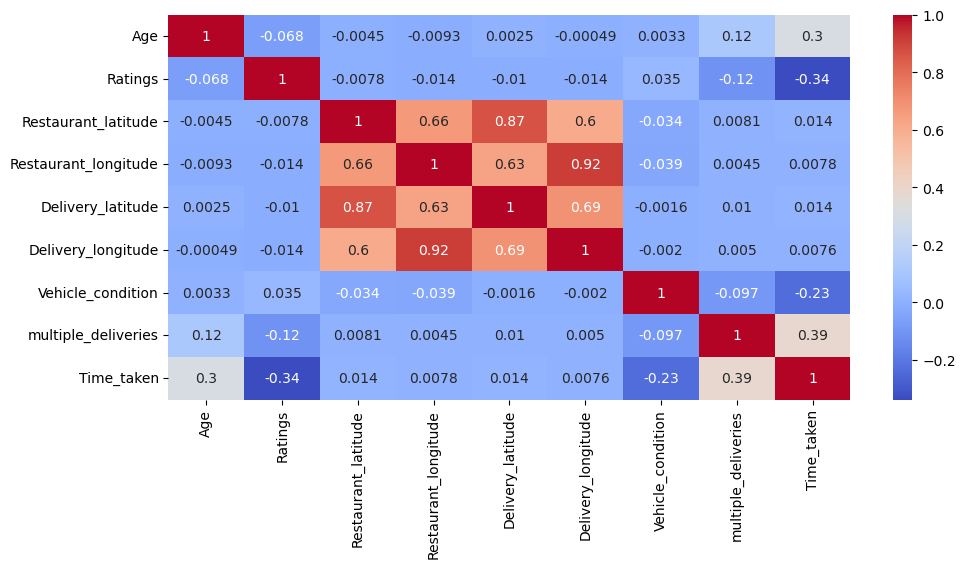

In [40]:
## Checking for correlation
plt.figure(figsize=(11,5))
sns.heatmap(df2.corr(), annot=True, cmap=plt.cm.coolwarm)
plt.show()

- As you seen in above correlation matrix Restaurant_latitude,Restaurant_longitude,Delivery_latitude,
  Delivery_longitude have strong correlation (Multicolinearity) so instead of dropping them we create
  new feature distance.
- we can calculate distance from 2 lattitude and 2 longitude by using geodesic library.

### Data Preprocessing.

#### Remove the unwanted columns.

In [41]:
df2 = df2.drop(["ID","Delivery_person_ID"],axis=1)

#### Creating New Features From Order_Date Feature.

In [42]:
# First Changing data type of Order_Date in to datetime
df2["Date"]= pd.to_datetime(df2["Date"])

In [43]:
# Creating New Features.
df2["Month"]=df2.Date.dt.month
df2["Day"]=df2.Date.dt.day

df2.drop("Date",axis=1,inplace=True)

In [44]:
df2.head()

,Age,Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_latitude,Delivery_longitude,Time_Orderd,Time_Order_picked,Weather,Traffic,Vehicle_condition,Type_of_order,Vehicle,multiple_deliveries,Festival,City,Time_taken,Month,Day
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,11:30:00,11:45:00,Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24,3,19
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,19:45:00,19:50:00,Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33,3,25
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,08:30:00,08:45:00,Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,26,3,19
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,18:00:00,18:10:00,Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21,5,4
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,13:30:00,13:45:00,Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,30,3,26


#### Creating New Feature from Restaurant and Delivery (latitude, longitude).

In [45]:
## Creating New Feature On lattitude and Longitude 
df2['distance_KM'] = np.zeros(len(df2))
restaurant_cordinates = df2[['Restaurant_latitude','Restaurant_longitude']].to_numpy()
delivery_cordinates = df2[['Delivery_latitude','Delivery_longitude']].to_numpy()

for i in range(len(df2)):
    df2['distance_KM'].loc[i] = geodesic(restaurant_cordinates[i],delivery_cordinates[i])

In [46]:
df2["distance_KM"] = df2["distance_KM"].astype(str).apply(lambda x:x.split(" ")[0])

In [47]:
df2["distance_KM"] = df2["distance_KM"].astype(float).apply(lambda x:np.around(x,2))

In [48]:
df2 = df2.drop(["Restaurant_latitude","Restaurant_longitude","Delivery_latitude",
                "Delivery_longitude"],axis=1)

#### Time_Ordered and Time_Order_Picked Feature.

In [49]:
df2["Time_Orderd"] = pd.to_datetime(df2["Time_Orderd"])

In [50]:
df2["Orderd_hour"] = df2.Time_Orderd.dt.hour
df2["Orderd_minute"] = df2.Time_Orderd.dt.minute

In [51]:
df2["Time_Order_picked"] = pd.to_datetime(df2["Time_Order_picked"])

In [52]:
df2["Order_picked_hour"] = df2.Time_Order_picked.dt.hour
df2["Order_picked_minute"] = df2.Time_Order_picked.dt.minute

In [53]:
df2.drop(["Time_Orderd","Time_Order_picked"],axis=1,inplace=True)

#### Encoding Categorical Features.

In [54]:
from sklearn.preprocessing import OrdinalEncoder

In [55]:
encoder = OrdinalEncoder()

In [56]:
df2[categorical].nunique()

Weather          6
Traffic          4
Type_of_order    4
Vehicle          4
Festival         2
City             3
dtype: int64

In [57]:
# Function to encode non-null data and replace it in the original data.

def encode(data):
    nonulls = np.array(data.dropna())
    impute_reshape = nonulls.reshape(-1,1)
    impute_ordinal = encoder.fit_transform(impute_reshape)
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data

for cols in categorical:
    encode(df2[cols])

### Feature Selection.

#### Feature Selection Through Correlation.

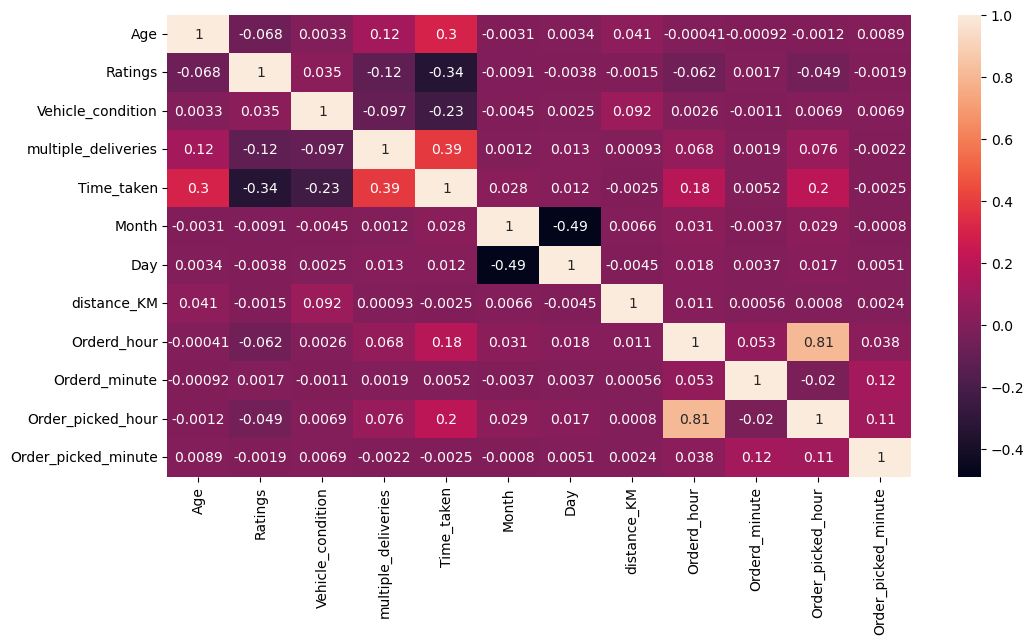

In [58]:
plt.figure(figsize=(12,6))
sns.heatmap(df2.corr(),annot=True)
plt.show()

- Orderd_hour and Order_Picked_hour are strongaly correlated (Showing Multicolinearity).

#### Feature Selection Through Variance Threshold Method.

In [59]:
from sklearn.feature_selection import VarianceThreshold

In [60]:
var = VarianceThreshold(threshold=0.10)
var.fit_transform(df2)
pd.Series(var.get_support(), index=df2.columns)

Age                     True
Ratings                 True
Weather                 True
Traffic                 True
Vehicle_condition       True
Type_of_order           True
Vehicle                 True
multiple_deliveries     True
Festival               False
City                    True
Time_taken              True
Month                   True
Day                     True
distance_KM             True
Orderd_hour             True
Orderd_minute           True
Order_picked_hour       True
Order_picked_minute     True
dtype: bool

### Data Preprocessing.

In [61]:
# Dropping Order_Picked_Hour because it strongly correlated with Orderd Hour.
df2.drop("Order_picked_hour",axis=1,inplace=True)

In [62]:
# Changing data type of Some columns :
try:    
    df2["Weather"]=df2["Weather"].astype(float)
    df2['Traffic']=df2['Traffic'].astype(float)
    df2['Type_of_order']=df2['Type_of_order'].astype(float)
    df2['Vehicle']=df2['Vehicle'].astype(float)
    df2['Festival']=df2['Festival'].astype(float)
    df2['City']=df2['City'].astype(float)
except:
    print(traceback.print_exc())

#### Handling Missing Values,

In [63]:
from sklearn.impute import SimpleImputer

In [64]:
df2.isna().sum()

Age                    1854
Ratings                1908
Weather                 616
Traffic                 601
Vehicle_condition         0
Type_of_order             0
Vehicle                   0
multiple_deliveries     993
Festival                228
City                   1200
Time_taken                0
Month                     0
Day                       0
distance_KM               0
Orderd_hour            1731
Orderd_minute          1731
Order_picked_minute       0
dtype: int64

In [65]:
# Imputing Missing Values With Simple Imputer.

mode_imputer = SimpleImputer(strategy='most_frequent')

df2['Weather'] = mode_imputer.fit_transform(df2['Weather'].values.reshape(-1,1))
df2['Traffic'] = mode_imputer.fit_transform(df2['Traffic'].values.reshape(-1,1))
df2['Festival'] = mode_imputer.fit_transform(df2['Festival'].values.reshape(-1,1))
df2['City'] = mode_imputer.fit_transform(df2['City'].values.reshape(-1,1))
df2['multiple_deliveries'] = mode_imputer.fit_transform(df2['multiple_deliveries'].values.reshape(-1,1))

In [66]:
# Imputing with KNNImputer

from sklearn.impute import KNNImputer

#Define a subset of the dataset
df_knn = df2.filter(["Age","Ratings"], axis=1)

df_knn = pd.DataFrame(df_knn, columns = df_knn.columns)

# Define KNN imputer and fill missing values
knn_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df_knn), columns=df_knn.columns)

In [67]:
df2 = df2.drop(["Age","Ratings"], axis=1)

In [68]:
df2 = pd.concat([df2,df_knn_imputed],axis=1)

In [69]:
# Dropping Missing Values in Orderd_Hour and Orderd_minute.
df2 = df2.dropna(subset=["Orderd_hour","Orderd_minute"])

In [70]:
try:    
    df2['Orderd_hour']=df2['Orderd_hour'].astype(int)
    df2['Orderd_minute']=df2['Orderd_minute'].astype(int)
    df2['Weather']=df2['Weather'].astype(int)
    df2['Traffic']=df2['Traffic'].astype(int)
    df2['Type_of_order']=df2['Type_of_order'].astype(int)
    df2['Vehicle']=df2['Vehicle'].astype(int)
    df2['multiple_deliveries']=df2['multiple_deliveries'].astype(int)
    df2['Festival']=df2['Festival'].astype(int)
    df2['City']=df2['City'].astype(int)
    df2['Age']=df2['Age'].astype(int)
except:
    print(traceback.print_exc())

In [71]:
df2.head()

,Weather,Traffic,Vehicle_condition,Type_of_order,Vehicle,multiple_deliveries,Festival,City,Time_taken,Month,Day,distance_KM,Orderd_hour,Orderd_minute,Order_picked_minute,Age,Ratings
0,4,0,2,3,2,0,0,2,24,3,19,3.02,11,30,45,37,4.9
1,3,1,2,3,3,1,0,0,33,3,25,20.14,19,45,50,34,4.5
2,2,2,0,1,2,1,0,2,26,3,19,1.55,8,30,45,23,4.4
3,4,3,0,0,2,1,0,0,21,5,4,7.77,18,0,10,38,4.7
4,0,0,1,3,3,1,0,0,30,3,26,6.20,13,30,45,32,4.6


#### Festival Feature.

In [72]:
df2["Festival"].value_counts()

0    43005
1      857
Name: Festival, dtype: int64

In [73]:
# Festival features does not play imp role because more than 95% records for single class.
df2.drop("Festival",axis=1,inplace=True)

#### Outliar Treatment.

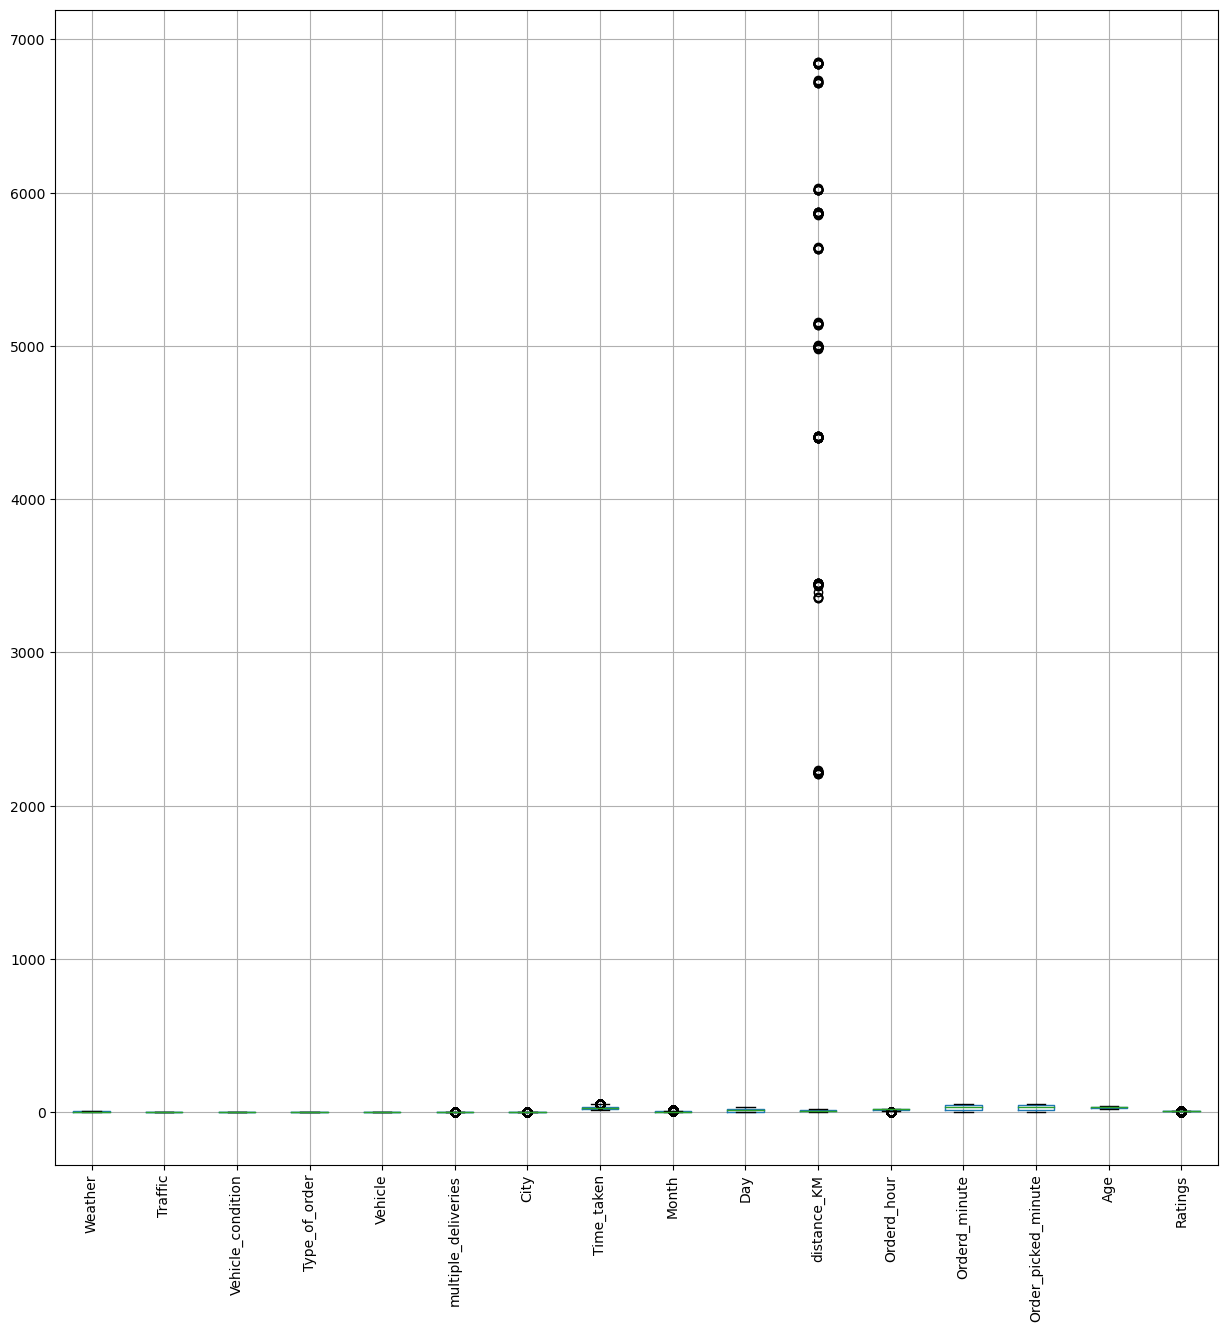

In [74]:
plt.figure(figsize=(15,15))
df2.boxplot()
plt.xticks(rotation=90)
plt.show()

#### distance in km

<AxesSubplot:xlabel='distance_KM'>

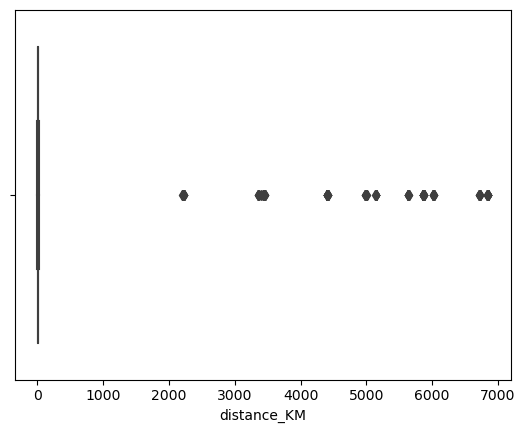

In [75]:
sns.boxplot(df2["distance_KM"])

In [76]:
Q1 = df2["distance_KM"].quantile(0.25)
Q3 = df2["distance_KM"].quantile(0.75)
IQR = Q3 - Q1
upper = Q3+1.5*IQR
print(Q1,Q3,IQR,upper)

4.65 13.66 9.01 27.175


In [77]:
df2["distance_KM"] = np.where(df2["distance_KM"]>upper,upper,df2["distance_KM"])

#### Delivery person age

<AxesSubplot:xlabel='Age'>

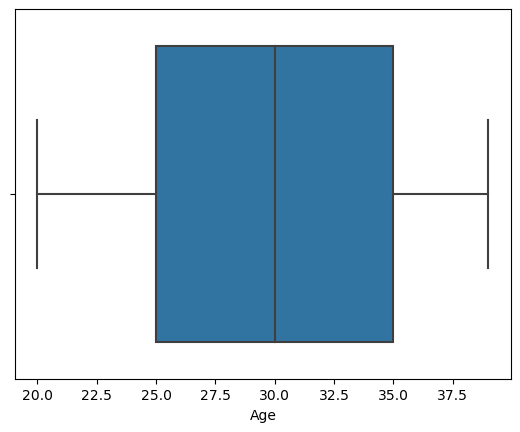

In [78]:
sns.boxplot(df2["Age"])

#### Delivery person ratings

<AxesSubplot:xlabel='Ratings'>

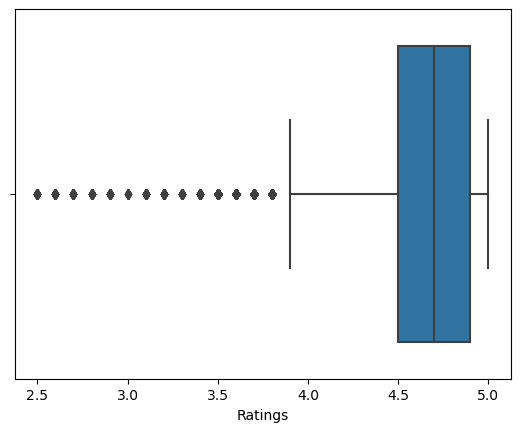

In [79]:
sns.boxplot(df2["Ratings"])

### Split Dataset Into Training And Testing Set.

In [80]:
df2.head()

,Weather,Traffic,Vehicle_condition,Type_of_order,Vehicle,multiple_deliveries,City,Time_taken,Month,Day,distance_KM,Orderd_hour,Orderd_minute,Order_picked_minute,Age,Ratings
0,4,0,2,3,2,0,2,24,3,19,3.02,11,30,45,37,4.9
1,3,1,2,3,3,1,0,33,3,25,20.14,19,45,50,34,4.5
2,2,2,0,1,2,1,2,26,3,19,1.55,8,30,45,23,4.4
3,4,3,0,0,2,1,0,21,5,4,7.77,18,0,10,38,4.7
4,0,0,1,3,3,1,0,30,3,26,6.20,13,30,45,32,4.6


In [81]:
X = df2.drop("Time_taken",axis=1)
Y = df2["Time_taken"]
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

#### Normalizing Data.

In [82]:
scalar = MinMaxScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.fit_transform (x_test)

### Model Building.

#### importing All Required Libraries

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [84]:
lr = LinearRegression()
knn= KNeighborsRegressor(n_neighbors=40)
tree= DecisionTreeRegressor(random_state=24)
forest= RandomForestRegressor(random_state=24)
ada = AdaBoostRegressor(random_state=42)
grad = GradientBoostingRegressor()
xboost= XGBRegressor(random_state=24)

In [85]:
# now, create a list with the objects 
models= [lr, knn, tree, forest, ada, grad, xboost]

In [86]:
mean_absolute = []
mean_squared = []

In [87]:
for model in models:
    model.fit(x_train,y_train) 
    train_acc = model.score(x_test,y_test)
    y_pred= model.predict(x_test)
    
    mae = mean_absolute_error(y_test,y_pred)
    mean_absolute.append(mae)
    mse = mean_squared_error(y_test,y_pred)
    mean_squared.append(mse)
    r2 = r2_score(y_test,y_pred)
    adj_r2 = 1 - ((1-r2)*(df.shape[0]-1)/(df.shape[0]-df.shape[1]-1))
    
    print(model)
    print("Training Accuracy :%.4f"%train_acc)
    print("Mean Absolute Error :%.4f"%mae)
    print("Mean Squared Error :%.4f"%mse)
    print("R2 Score :%.4f"%r2)
    print("Adjusted R2 :%.4f"%adj_r2)
    print()

LinearRegression()
Training Accuracy :0.4668
Mean Absolute Error :5.4858
Mean Squared Error :46.7762
R2 Score :0.4668
Adjusted R2 :0.4666

KNeighborsRegressor(n_neighbors=40)
Training Accuracy :0.5491
Mean Absolute Error :5.0602
Mean Squared Error :39.5597
R2 Score :0.5491
Adjusted R2 :0.5489

DecisionTreeRegressor(random_state=24)
Training Accuracy :0.6741
Mean Absolute Error :4.0919
Mean Squared Error :28.5930
R2 Score :0.6741
Adjusted R2 :0.6739

RandomForestRegressor(random_state=24)
Training Accuracy :0.8296
Mean Absolute Error :3.0819
Mean Squared Error :14.9472
R2 Score :0.8296
Adjusted R2 :0.8295

AdaBoostRegressor(random_state=42)
Training Accuracy :0.6547
Mean Absolute Error :4.5178
Mean Squared Error :30.2966
R2 Score :0.6547
Adjusted R2 :0.6545

GradientBoostingRegressor()
Training Accuracy :0.7837
Mean Absolute Error :3.4405
Mean Squared Error :18.9795
R2 Score :0.7837
Adjusted R2 :0.7836

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsampl

#### Models Comparison.

In [88]:
mean_absolute

[5.485771467904715,
 5.0601989057335,
 4.091872791519434,
 3.0818891865192444,
 4.51779453320094,
 3.440505471330543,
 3.1319699526023363]

In [89]:
mean_squared

[46.776198683534744,
 39.559683902313914,
 28.59295565940955,
 14.9472061076567,
 30.296635415748117,
 18.979532376988868,
 15.44038881835523]

In [90]:
reg_models= ["Linear Regression", "KNN", "Decision Tree", "Random Forest", "Adaboost",
             "GradientBoost", "XGBoost"]

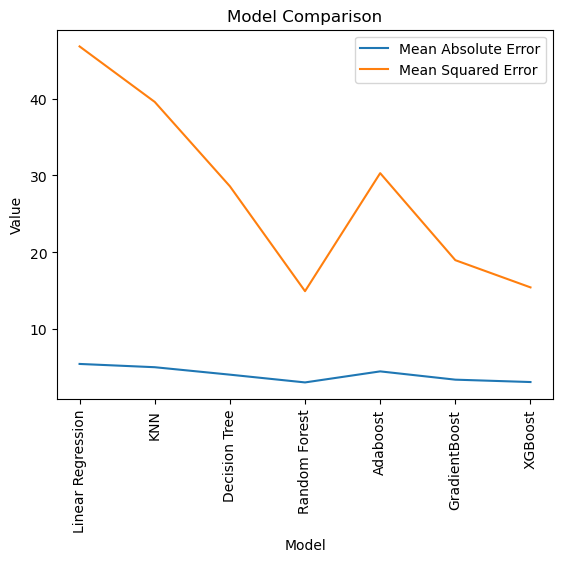

In [91]:
plt.plot(reg_models,mean_absolute,label='Mean Absolute Error')
plt.plot(reg_models,mean_squared,label='Mean Squared Error')
plt.xlabel('Model')
plt.ylabel('Value')
plt.title('Model Comparison')
plt.legend()
plt.xticks(rotation=90);

#### Feature Importance Through XGBoostRegressor.

Training Accuracy :0.82
Mean Absolute Error :3.13
Mean Squared Error :15.44
R2 Score :0.82
Adjusted R2 :0.82



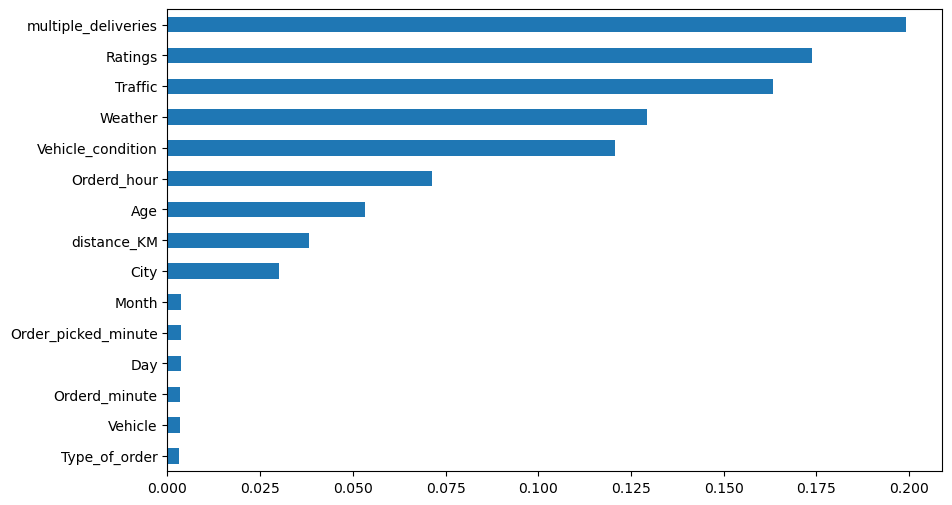

In [92]:
xgboost= XGBRegressor(random_state=24)
xgboost.fit(x_train,y_train) 
train_acc = xgboost.score(x_test,y_test)
y_pred= xgboost.predict(x_test)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
adj_r2 = 1 - ((1-r2)*(df.shape[0]-1)/(df.shape[0]-df.shape[1]-1))

print("Training Accuracy :%.2f"%train_acc)
print("Mean Absolute Error :%.2f"%mae)
print("Mean Squared Error :%.2f"%mse)
print("R2 Score :%.2f"%r2)
print("Adjusted R2 :%.2f"%adj_r2)
print()

xgb_importances = pd.Series(xgboost.feature_importances_, index=X.columns).sort_values()
# plotting bar chart according to feature importance
plt.figure(figsize=(10,6))
xgb_importances.plot(kind='barh')
plt.show()

#### Feature Importance Through RandomForestRegressor.

Training Accuracy :0.83
Mean Absolute Error :3.08
Mean Squared Error :14.95
R2 Score :0.83
Adjusted R2 :0.83



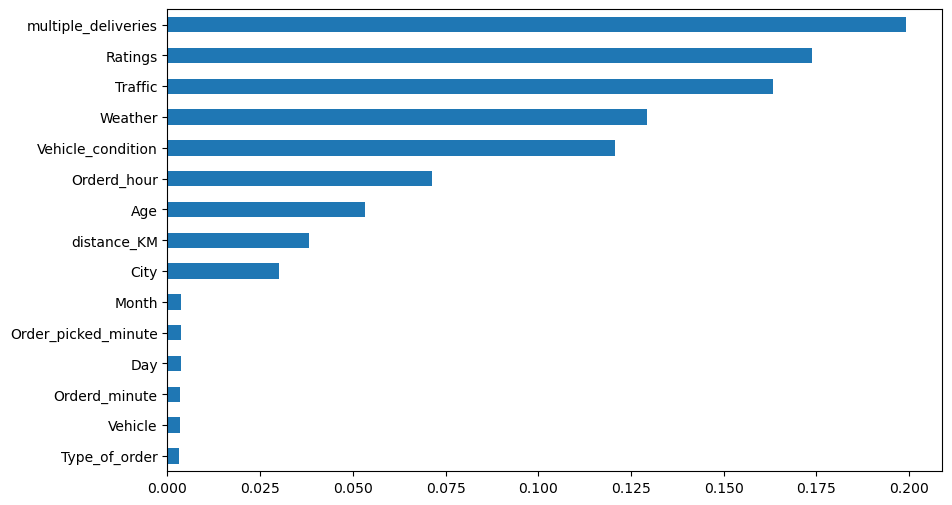

In [93]:
forest= RandomForestRegressor(random_state=24)
forest.fit(x_train,y_train) 
train_acc = forest.score(x_test,y_test)
y_pred= forest.predict(x_test)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
adj_r2 = 1 - ((1-r2)*(df.shape[0]-1)/(df.shape[0]-df.shape[1]-1))

print("Training Accuracy :%.2f"%train_acc)
print("Mean Absolute Error :%.2f"%mae)
print("Mean Squared Error :%.2f"%mse)
print("R2 Score :%.2f"%r2)
print("Adjusted R2 :%.2f"%adj_r2)
print()

forest_importances = pd.Series(forest.feature_importances_, index=X.columns).sort_values()
# plotting bar chart according to feature importance
plt.figure(figsize=(10,6))
xgb_importances.plot(kind='barh')
plt.show()

#### Feature Importance Through GradientBoost Regressor.

Training Accuracy :0.78
Mean Absolute Error :3.44
Mean Squared Error :18.98
R2 Score :0.78
Adjusted R2 :0.78



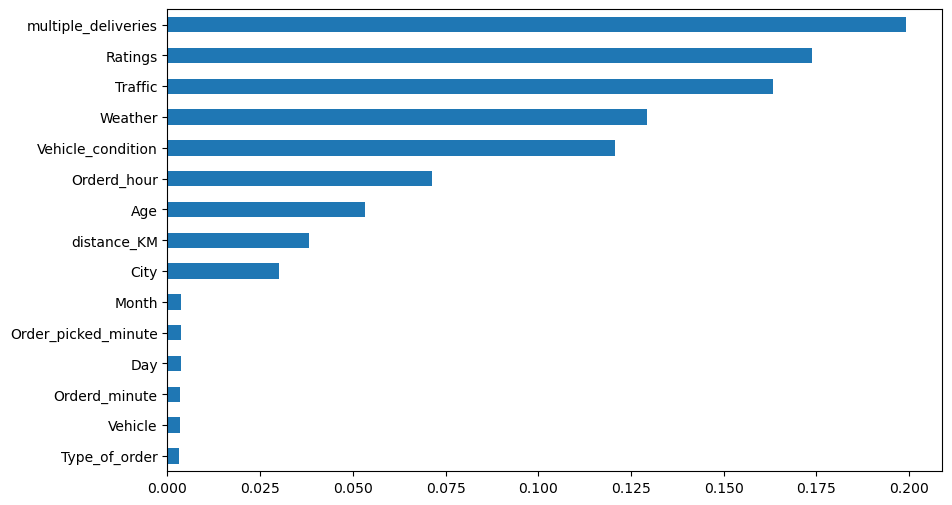

In [94]:
grad= GradientBoostingRegressor(random_state=24)
grad.fit(x_train,y_train) 
train_acc = grad.score(x_test,y_test)
y_pred= grad.predict(x_test)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
adj_r2 = 1 - ((1-r2)*(df.shape[0]-1)/(df.shape[0]-df.shape[1]-1))

print("Training Accuracy :%.2f"%train_acc)
print("Mean Absolute Error :%.2f"%mae)
print("Mean Squared Error :%.2f"%mse)
print("R2 Score :%.2f"%r2)
print("Adjusted R2 :%.2f"%adj_r2)
print()

grad_importances = pd.Series(grad.feature_importances_, index=X.columns).sort_values()
# plotting bar chart according to feature importance
plt.figure(figsize=(10,6))
xgb_importances.plot(kind='barh')
plt.show()

### HyperParameter Tunning.

#### Hyperparameter Tunning Through RandomForestRegressor.

In [95]:
rf = RandomForestRegressor()

params = {"n_estimators" : [5,20,50,100], 
                "max_features" : ['auto', 'sqrt'], 
                "max_depth" : [int(x) for x in np.linspace(10, 120, num = 12)],
                "min_samples_split" : [2, 6, 10,14,16,18,20],
                "min_samples_leaf" : [1, 3, 4,5,7,9,12],
                "bootstrap" : [True, False]
          }

rf_random = RandomizedSearchCV(estimator = rf,param_distributions = params,
                               n_iter = 100, cv = 5, verbose=2, random_state=35,
                               n_jobs = -1)

rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4, 5, 7, 9,
                                                             12],
                                        'min_samples_split': [2, 6, 10, 14, 16,
                                                              18, 20],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [96]:
rf_random.best_params_

{'n_estimators': 50,
 'min_samples_split': 10,
 'min_samples_leaf': 3,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [97]:
rfr =  RandomForestRegressor(n_estimators = 50, min_samples_split = 10,
                             min_samples_leaf= 3, max_features = 'auto',
                             max_depth= 10, bootstrap=True) 

rfr.fit(x_train,y_train) 
train_acc = rfr.score(x_test,y_test)
y_pred_rfr= rfr.predict(x_test)
mae = mean_absolute_error(y_test,y_pred_rfr)
mse = mean_squared_error(y_test,y_pred_rfr)
r2 = r2_score(y_test,y_pred_rfr)
adj_r2 = 1 - ((1-r2)*(df.shape[0]-1)/(df.shape[0]-df.shape[1]-1))

print("Training Accuracy :%.2f"%train_acc)
print("Mean Absolute Error :%.2f"%mae)
print("Mean Squared Error :%.2f"%mse)
print("R2 Score :%.2f"%r2)
print("Adjusted R2 :%.2f"%adj_r2)
print()

Training Accuracy :0.84
Mean Absolute Error :3.03
Mean Squared Error :14.23
R2 Score :0.84
Adjusted R2 :0.84



<AxesSubplot:xlabel='actual_time', ylabel='predicted_time'>

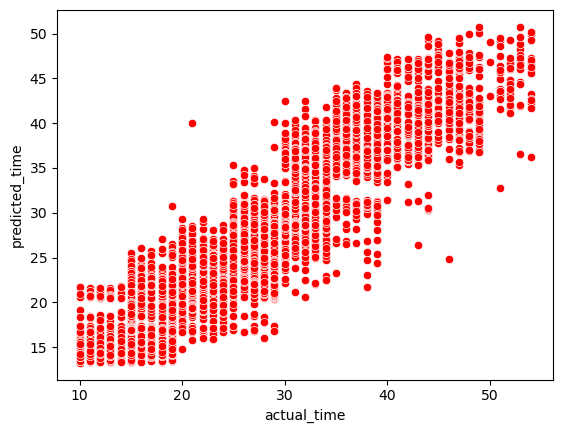

In [99]:
sns.scatterplot(y_pred_rf["actual_time"],y_pred_rf["predicted_time"],c=["r"])

### Building Model On Entire Dataset.

In [100]:
X_scaled = scalar.fit_transform(X)

In [101]:
rfr_new =  RandomForestRegressor(n_estimators = 50, min_samples_split = 10,
                             min_samples_leaf= 3, max_features = 'auto',
                             max_depth= 10, bootstrap=True)
rfr_new.fit(X_scaled,Y)

RandomForestRegressor(max_depth=10, max_features='auto', min_samples_leaf=3,
                      min_samples_split=10, n_estimators=50)

In [102]:
train_acc = rfr_new.score(X_scaled,Y)
y_pred_new= rfr_new.predict(X_scaled)
mae = mean_absolute_error(Y,y_pred_new)
mse = mean_squared_error(Y,y_pred_new)
r2 = r2_score(Y,y_pred_new)
adj_r2 = 1 - ((1-r2)*(df.shape[0]-1)/(df.shape[0]-df.shape[1]-1))

print("Training Accuracy :%.2f"%train_acc)
print("Mean Absolute Error :%.2f"%mae)
print("Mean Squared Error :%.2f"%mse)
print("R2 Score :%.2f"%r2)
print("Adjusted R2 :%.2f"%adj_r2)
print()

Training Accuracy :0.85
Mean Absolute Error :2.91
Mean Squared Error :12.89
R2 Score :0.85
Adjusted R2 :0.85



#### Dumping Model.

In [103]:
import pickle

In [105]:
pickle.dump(rfr_new,open("random_forest.pickle","wb"))

### Conclusion.

- Through this project, we created a machine learning model that is able to predict time taken for       food delivery . The best model was Random Forest Regressor with optimized hyperparameters.
- We should focus on multiple_deliveries, Ratings, Traffic as they are high importance features for     the model and business.